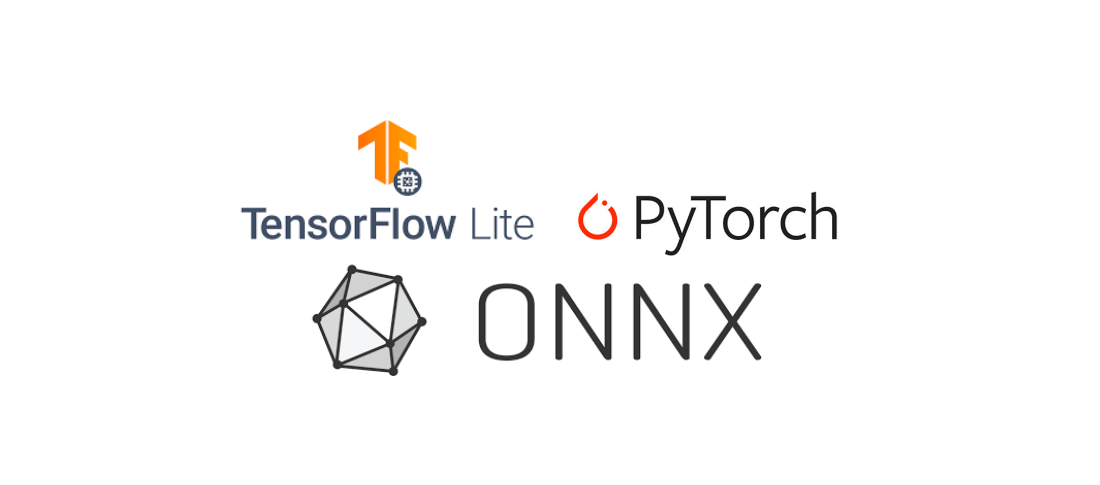
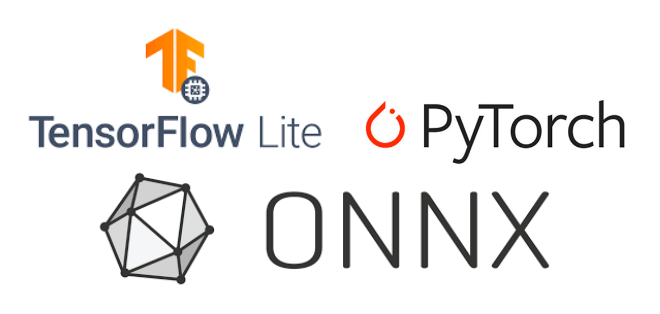
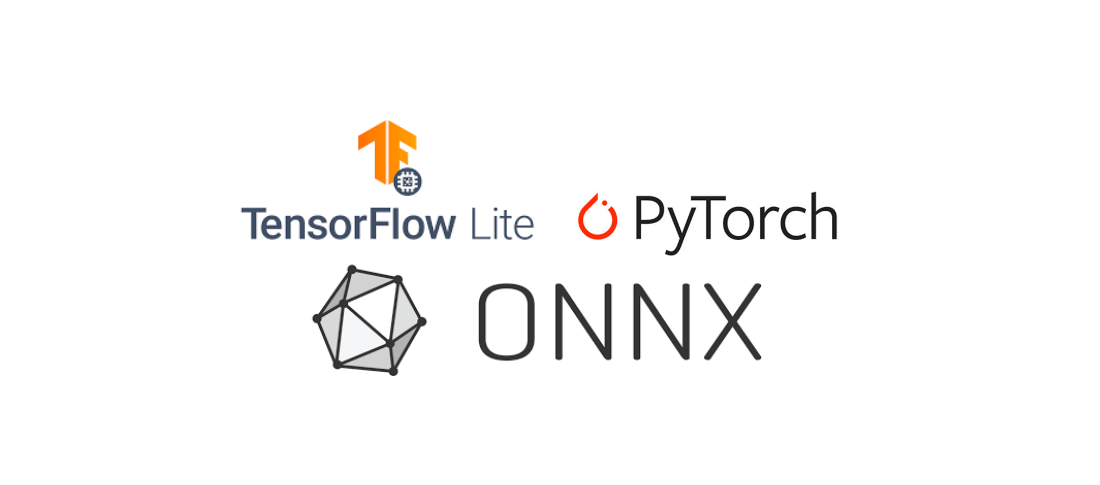

# Tensorflow to Tensorflow Lite

In this code, we first load the pre-trained ResNet50 model in TensorFlow using tf.keras.applications.ResNet50.

We then convert the TensorFlow model to TensorFlow Lite format using tf.lite.TFLiteConverter.from_keras_model, which takes the TensorFlow model as input.

Finally, we save the TensorFlow Lite model to a file using open and write.

In [1]:
import tensorflow as tf

# Load the pre-trained ResNet model in TensorFlow
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Convert the TensorFlow model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('resnet50.tflite', 'wb') as f:
    f.write(tflite_model)


102967424/102967424 [==============================] - 1s 0us/step


# Pytorch to Tensorflow Lite

**Idea**:

Converting a PyTorch model to TensorFlow Lite is not a straightforward process, as the two frameworks have different graph structures and execution models. However, there are several approaches to convert PyTorch models to TensorFlow Lite, including using third-party libraries like ONNX and TensorFlow Lite Converter.
Here's an example code that shows how to use ONNX to convert a pre-trained PyTorch model to TensorFlow Lite:

**The steps are:**

1. Load the pre-trained PyTorch model using torch.load. 

2. Export the PyTorch model to ONNX format using torch.onnx.export. Note that we need to provide a dummy input tensor to the export function to specify the input shape of the model.

3. Use ONNX-TensorFlow to convert the ONNX model to TensorFlow format. ONNX-TensorFlow is a Python package that converts ONNX models to TensorFlow graphs, and it provides a prepare function that takes an ONNX model as input and returns a TensorFlow graph.

4. Use the TensorFlow Lite Converter to convert the TensorFlow model to TensorFlow Lite format, and we save the resulting model to a file using open and write.

In [2]:
!pip install onnx_tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.3 MB/s eta 0:00:00


In [3]:
import torch
import onnx
import tensorflow as tf
import onnx_tf
from torchvision.models import resnet50

# Load the PyTorch ResNet50 model
pytorch_model = resnet50(pretrained=True)
pytorch_model.eval()

# Export the PyTorch model to ONNX format
input_shape = (1, 3, 224, 224)
dummy_input = torch.randn(input_shape)
onnx_model_path = 'resnet50.onnx'
torch.onnx.export(pytorch_model, dummy_input, onnx_model_path, verbose=False)

# Load the ONNX model
onnx_model = onnx.load(onnx_model_path)

# Convert the ONNX model to TensorFlow format
tf_model_path = 'resnet50.pb'
tf_rep = onnx_tf.backend.prepare(onnx_model)
tf_rep.export_graph(tf_model_path)

# Convert the TensorFlow model to TensorFlow Lite format
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(tf_model_path)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('resnet50.tflite', 'wb') as f:
    f.write(tflite_model)


/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

## Happy Kaggling! 